# Nobel Prize

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
plt.rcParams['figure.figsize'] = (16, 7)

In [3]:
!head -n 1 archive.csv

Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country


In [4]:
nobeldf = pd.read_csv("archive.csv", parse_dates = ["Birth Date", "Death Date"])

In [5]:
nobeldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 18 columns):
Year                    969 non-null int64
Category                969 non-null object
Prize                   969 non-null object
Motivation              881 non-null object
Prize Share             969 non-null object
Laureate ID             969 non-null int64
Laureate Type           969 non-null object
Full Name               969 non-null object
Birth Date              969 non-null object
Birth City              941 non-null object
Birth Country           943 non-null object
Sex                     943 non-null object
Organization Name       722 non-null object
Organization City       716 non-null object
Organization Country    716 non-null object
Death Date              617 non-null datetime64[ns]
Death City              599 non-null object
Death Country           605 non-null object
dtypes: datetime64[ns](1), int64(2), object(15)
memory usage: 136.3+ KB


The Birth Date didn't get converted to datetime because of "nan"'s.

In [6]:
nobeldf = nobeldf.replace(to_replace = "nan", value=0)

In [7]:
nobeldf["Birth Year"] = nobeldf["Birth Date"].str[0:4]

In [8]:
nobeldf['Birth Year'].head()

0    1852
1    1839
2    1854
3    1828
4    1822
Name: Birth Year, dtype: object

In [9]:
nobeldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 19 columns):
Year                    969 non-null int64
Category                969 non-null object
Prize                   969 non-null object
Motivation              881 non-null object
Prize Share             969 non-null object
Laureate ID             969 non-null int64
Laureate Type           969 non-null object
Full Name               969 non-null object
Birth Date              969 non-null object
Birth City              941 non-null object
Birth Country           943 non-null object
Sex                     943 non-null object
Organization Name       722 non-null object
Organization City       716 non-null object
Organization Country    716 non-null object
Death Date              617 non-null datetime64[ns]
Death City              599 non-null object
Death Country           605 non-null object
Birth Year              940 non-null object
dtypes: datetime64[ns](1), int64(2), object(16)
memor

In [10]:
nobeldf["Birth Year"] = pd.to_numeric(nobeldf["Birth Year"])

In [11]:
nobeldf["Birth Year"].head()

0    1852.0
1    1839.0
2    1854.0
3    1828.0
4    1822.0
Name: Birth Year, dtype: float64

In [12]:
nobeldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 19 columns):
Year                    969 non-null int64
Category                969 non-null object
Prize                   969 non-null object
Motivation              881 non-null object
Prize Share             969 non-null object
Laureate ID             969 non-null int64
Laureate Type           969 non-null object
Full Name               969 non-null object
Birth Date              969 non-null object
Birth City              941 non-null object
Birth Country           943 non-null object
Sex                     943 non-null object
Organization Name       722 non-null object
Organization City       716 non-null object
Organization Country    716 non-null object
Death Date              617 non-null datetime64[ns]
Death City              599 non-null object
Death Country           605 non-null object
Birth Year              940 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), obj

### Age when prize was awarded

In [13]:
nobeldf["Age"] = nobeldf["Year"] - nobeldf["Birth Year"]

In [14]:
nobeldf.Age.value_counts().head()

61.0    35
63.0    34
64.0    34
56.0    33
54.0    33
Name: Age, dtype: int64

In [15]:
nobeldf.Age.describe()

count    940.000000
mean      59.485106
std       12.364399
min       17.000000
25%       50.000000
50%       60.000000
75%       69.000000
max       90.000000
Name: Age, dtype: float64

#### Distribution of age of Nobel Prize awardees

/Users/alonavarshal/anaconda/envs/py36/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


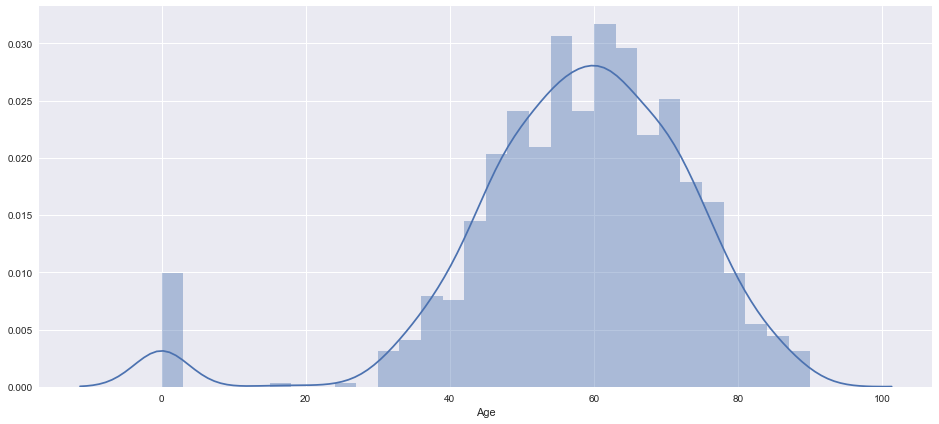

In [25]:
sns.distplot(nobeldf["Age"].fillna(0).astype(int), bins=30)
sns.despine();

### How many categories and how are they distributed?

In [18]:
nobeldf.Category.value_counts()

Medicine      227
Physics       222
Chemistry     194
Peace         130
Literature    113
Economics      83
Name: Category, dtype: int64

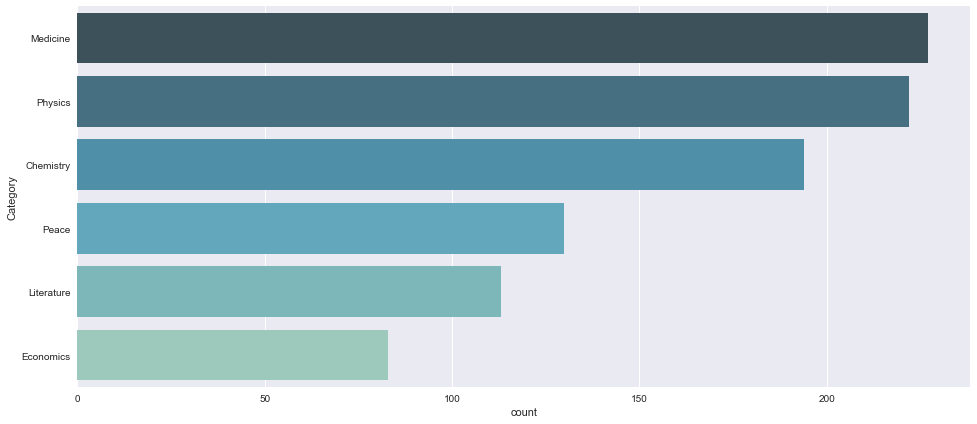

In [33]:
sns.countplot(y='Category', data= nobeldf, 
              order=nobeldf.Category.value_counts().index,
              palette='GnBu_d')
sns.despine();

## Males vs. Females

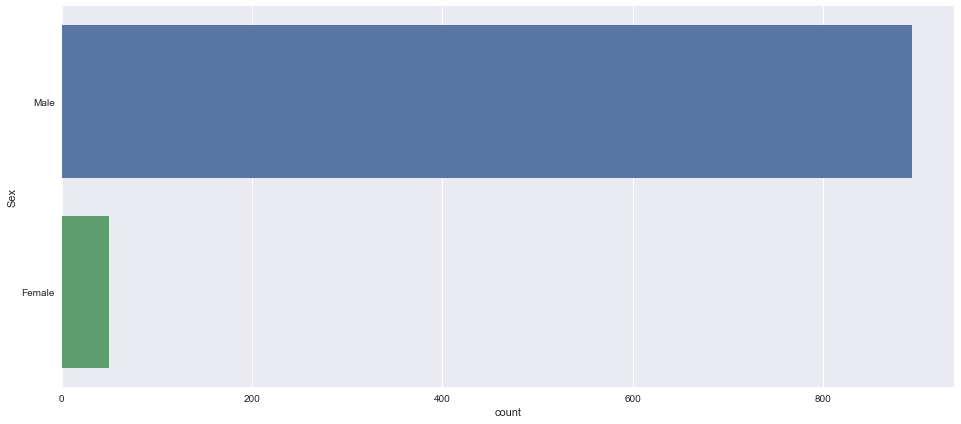

In [27]:
sns.countplot(y="Sex", data=nobeldf)
sns.despine();

## Awards by Country

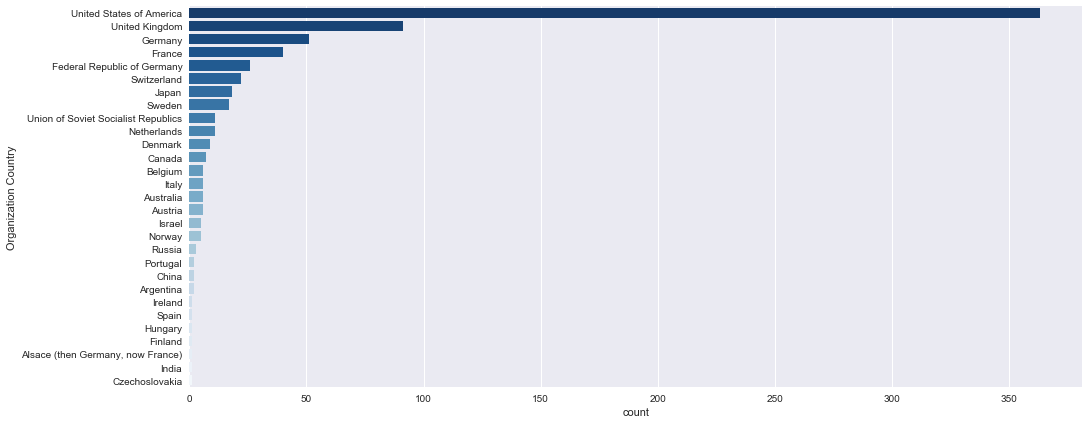

In [28]:
sns.countplot(y='Organization Country',
              data=nobeldf,
              order=nobeldf['Organization Country'].value_counts().index,
              palette='Blues_r')
sns.despine();

## You are most likely to be awarded a Nobel Prize if you are:

1. a male
2. in the area of medicine
3. living in the USA
4. around 60 years old